#I.Divide inputs into local patches and learn separate fit for each patch

Example:

Input :set of points with two dimensions

local patches:
1. cluster1
2. cluster2
3. cluster3

       
### Apply Competitive Learning on INPUT patches :

use any one method
1. neural network methods for ***online clustering(K means) ***
2. ***adaptive resonance theory (ART),***
3. ***self-organizing map(SOM).***

##Result: Inputs are localised

#II.Apply Supervised Learning on outputs from step.I above

1. If the fit in a local patch is constant, then we use the technique
 named the ***radial basis function (RBF) network;*** 
2. if it is a linear function
of the input, we use technique called the ***mixture of experts (MoE).***
3. We discuss both regression and classification, and also compare this approach with MLP,

#What is competitive Learning?

 Competitive learning is a form of **unsupervised learning** in artificial neural networks.It has a mechanism that permits the **neurons to compete** for the right to respond to a given **subset of inputs**, such that only one output neuron (or only one neuron per group), is active (i.e. "on") at a time. The neuron that wins the competition is called a **"winner-take-all" neuron.**

###See figure below
 

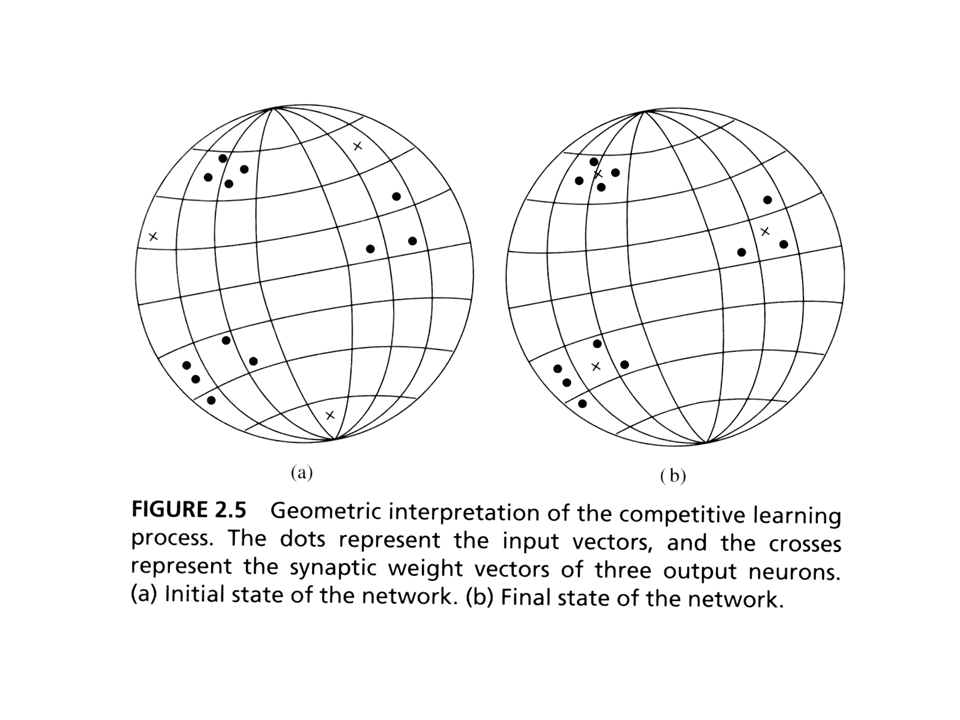

In [ ]:
from IPython.display import Image

Image(filename ='./competitive learning.png',width=600,height=400)


## Kmeans Illustration

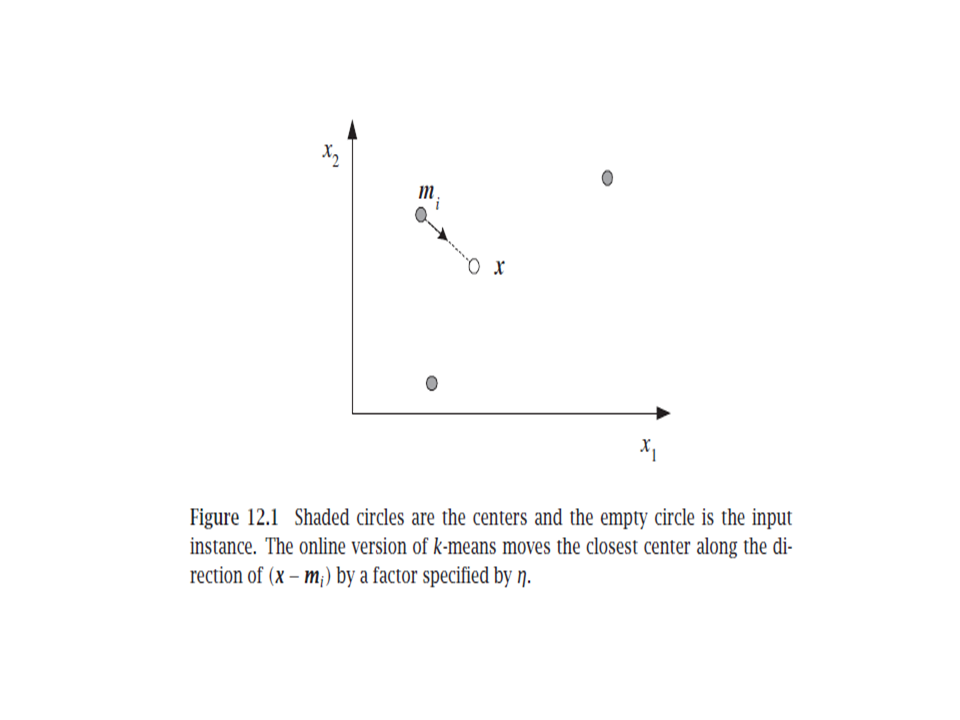

In [ ]:
from IPython.display import Image

Image(filename ='./Kmeans.png',width=800,height=400)


###K means algorithm

Initialize $m_i$, i = 1, . . . , k, for example, to k random $x^t$

Repeat For all $x^t ∈ X$ in random order

$i ← arg min_i ||x^t −m_i||$

$m_i ← m_i + η(x^t −m_i)$

Until $m_i$ converge

## Kmeans Explanation

***Error***

$E(({m_i})^k_{i=1}|X) = \frac{1}{2}\Sigma_t \Sigma_ib^t_i||x^t −m_i||^2$

where

$b^t_i=1 \ $if $||x^t −m_i|| = min_l ||x^t −m_l||$

$b^t_i=0 \ $ otherwise

Here 

$X = {x^t}_t$ is the ***sample***

and $m_i \ $, i = 1, . . . , k are the ***cluster centers.*** 

$b^t_i=1$ if $m_i$ is the ***closest center*** to $x^t$ in Euclidean distance.


 It is as if all
$m_l$, l = 1, . . . , k ***compete*** and $m_i$ wins the competition because it is the
closest.

 k-means, ***updates the centers*** as
$m_i =\frac{\Sigma_t b^t_i x^t}{\Sigma_t b^t_i}$

##online Kmeans Explanation

***Error*** (because inputs are processed one after one)

$E(({m_i})^k_{i=1}|X) = \frac{1}{2}\Sigma_t \Sigma_ib^t_i||x^t −m_i||^2= \frac{1}{2}\Sigma_t \Sigma^d_jb^t_i||x^t_j −m_{ij}||^2$

j=1...d instance number

***Update**

$Δm_{ij} = −η\frac{∂E^t}{∂m_{ij}}= ηb^t_i (x^t_j −m_{ij} )$




## Competitive learning network Architecture

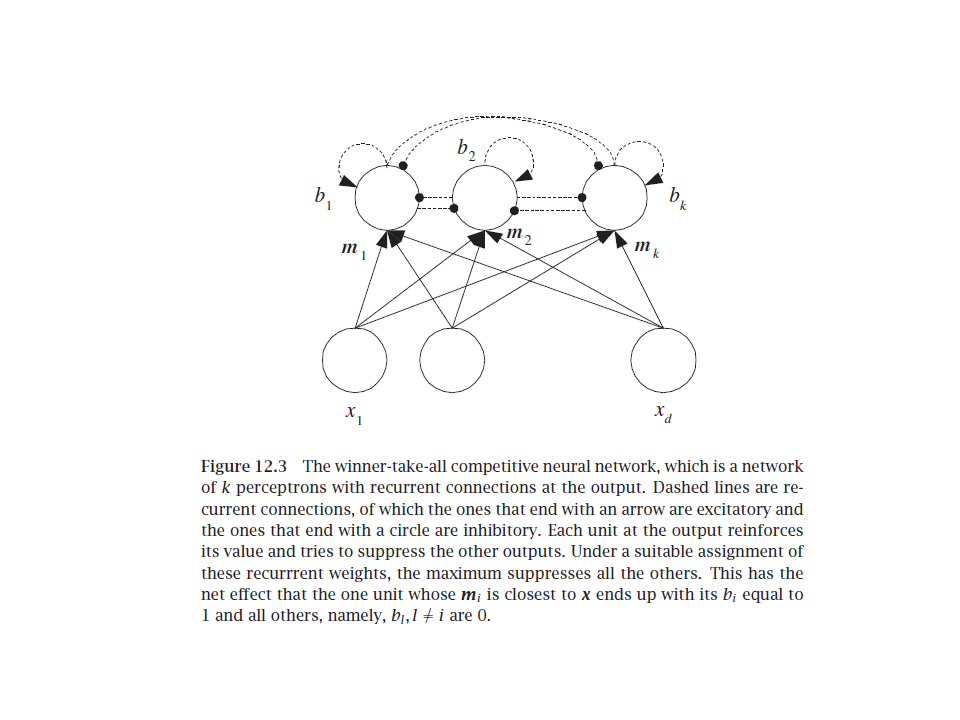

In [ ]:
Image(filename ='./WTA.png',width=600,height=600)


## Working of Competitive neural network from above figure

1. output nodes are $b_i=1...k$
2. Input nodes are  $x_d=1...d$
3. means are $m_i=1...k$
4. Each output nodes  has an ***excitatory recurrent connection (i.e., with a positive weight)*** to itself, and ***inhibitory recurrent connections (i.e., with negative weights)*** to the other output units. With an appropriate nonlinear activation function and positive and negative recurrent weight values, such a network, after some iterations, converges to a state where ***one output  becomes 1*** and all others become 0 (Grossberg 1980; Feldman and Ballard 1982).

***Euclidean distance for Error***

$||x^t-m_j||$ is Euclidean distance  measure used when all ***input attributes have the same variance and that they are not correlated.*** 

If this is not the case, this should be
reflected in the distance measure, that is, by using the ***Mahalanobis distance, or suitable normalization*** should be done, for example, by PCA, at a preprocessing stage before the Euclidean distance is used.

#Input properties effect on K means

1.Input attributes have the ***same variance*** and that they are not correlated

***Euclidean distance for Error***

$||x^t-m_j||$ is Euclidean distance  measure used when all ***input attributes have the same variance and that they are not correlated.*** 

2.Input attributes have the ***MULTIPLE variances***

If this is the case, we use the ***Mahalanobis distance, or suitable normalization*** should be done, for example, by PCA, at a preprocessing stage before the Euclidean distance is used.

## k Means

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

points_n = 200
clusters_n = 3
iteration_n = 100
seed = 123



## Create input datapoints between 0 and 10 with dimensions (200X2)

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)


In [ ]:
points = np.random.uniform(0, 10, (points_n, 2))
print("\n data type of points \n",type(points))
print("\n shape of points \n",points.shape)



 data type of points 
 <class 'numpy.ndarray'>

 shape of points 
 (200, 2)


## Extract three points from input as Centroids

In [ ]:
#tf.slice(input_, begin, size, name=None)
#divide input_ into cluster=size starting from begin 
centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])

print(centroids)

tf.Tensor(
[[5.65642001 0.84904163]
 [7.1946897  4.2310646 ]
 [5.13128154 6.6662455 ]], shape=(3, 2), dtype=float64)


## plot inputs and centroids

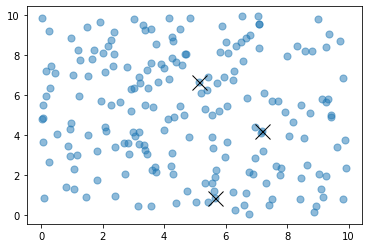

In [ ]:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

## Function to classify input based on smallest distance from old Centroids

1. calculate distance of each input from each centroid

$ x_i-m_{xj} \ ,\  y_i-m_{yj} $

2. calculate square of distance of each input from eah centroid 

$|x_i-m_{xj}|^2 \ , \ |y_i-m_{yj}|^2$

3. calculate resultant distance of each input from centroid

$|x_i-m_{xj}|^2+|y_i-m_{yj}|^2$

4.Classify inputs based on the smallest resultant distance from each centroid


In [ ]:
def closest_centroids(points, centroids):
    # 1.calculate distance of each input from each centroid
    dist_from_centroids=tf.subtract(points, centroids[:,None])

    #print("\n dist_from_centroids\n",dist_from_centroids.shape)

    # 2. calculate square of distance of each input from eah centroid 
    sq_dist_from_centroids=tf.square(dist_from_centroids)

    #print("\n sq_dist_from_centroids\n",sq_dist_from_centroids.shape)

    #3. calculate resultant distance of each input from centroid
    distances = tf.reduce_sum(sq_dist_from_centroids, 2)

    #print("\n distances\n",distances.shape)
            
    #4.Classify inputs based on the smallest resultant distance from each centroid
    temp_cluster = tf.argmin(distances, 0)

    #print("\n temp_cluster\n",temp_cluster)
    return temp_cluster


## Function to calculate new centroids 

In [ ]:
def move_centroids(points, closest, centroids):
    #points[closest==k] will output three arrays as k varies from 1 to 3
    #points[closest==k].mean(axis=0) will calculate three centroids
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


#Repeat above two functions for iterations=100

In [ ]:
for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    #print("\n closest \n",closest)

    centroids = move_centroids(points, closest, centroids)
    #print("\n centroids \n",centroids)



## print centroids after iterations=100

In [ ]:
print("centroids", centroids)

centroids [[2.3805468  3.4855907 ]
 [7.52317326 2.97237534]
 [4.38131768 8.07214821]]


## Plot inputs and centroids after iterations=100

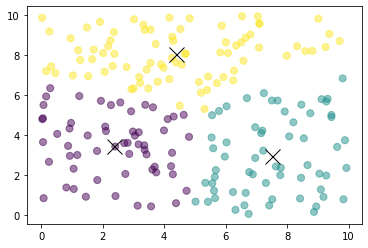

In [ ]:
plt.scatter(points[:, 0], points[:, 1], c=closest, s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

# XOR Implementation using CNN

In [ ]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

#from tensorflow import keras
#from tensorflow.keras import layers


2.8.2


In [ ]:
 #import tensorflow as tf
#  from keras.models import Sequential
#  from keras.layers.core import Dense, Dropout, Activation
#  #from keras.optimizers import SGD
#  import numpy as np
 
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
 

# model=tf.keras.Sequential()
# model.add(layers.Dense(2,input_shape=(2,), activation="tanh"))
# model.add(layers.Dense(1, activation="sigmoid"))
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(2, input_shape=(2,), activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#  model.add(layers.Dense(2, input_dim=2))
#  model.add(Activation('tanh'))
#  model.add(Dense(1))
#  model.add(Activation('sigmoid'))
 
sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics = ['accuracy'])
 
model.fit(X, y, batch_size=1, epochs=1000)
print(model.predict(X))


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2943 - accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2862 - accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2824 - accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2792 - accuracy: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2734 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.5000
Epoch 11/1000
4/4 [=============

In [ ]:
#import keras
import numpy as np



a = np.array([[1, 1], [0, 1], [1, 0], [0, 0]])
b = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation = 'sigmoid', input_shape = (2, )))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
rmsprop=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name='RMSprop',
)
model.compile(optimizer = rmsprop, metrics = ['accuracy'], loss = 'binary_crossentropy')
model.fit(x = a, y = b, epochs = 750)
print(model.predict(X))


Epoch 1/750
1/1 [==============================] - 0s 493ms/step - loss: 0.7558 - accuracy: 0.5000
Epoch 2/750
1/1 [==============================] - 0s 8ms/step - loss: 0.7544 - accuracy: 0.5000
Epoch 3/750
1/1 [==============================] - 0s 10ms/step - loss: 0.7535 - accuracy: 0.5000
Epoch 4/750
1/1 [==============================] - 0s 10ms/step - loss: 0.7527 - accuracy: 0.5000
Epoch 5/750
1/1 [==============================] - 0s 8ms/step - loss: 0.7520 - accuracy: 0.5000
Epoch 6/750
1/1 [==============================] - 0s 8ms/step - loss: 0.7513 - accuracy: 0.5000
Epoch 7/750
1/1 [==============================] - 0s 14ms/step - loss: 0.7508 - accuracy: 0.5000
Epoch 8/750
1/1 [==============================] - 0s 9ms/step - loss: 0.7502 - accuracy: 0.5000
Epoch 9/750
1/1 [==============================] - 0s 8ms/step - loss: 0.7497 - accuracy: 0.5000
Epoch 10/750
1/1 [==============================] - 0s 6ms/step - loss: 0.7492 - accuracy: 0.5000
Epoch 11/750
1/1 [======